**Autism Detection using VGG16**
Overview

This repository contains code for detecting autism using a deep learning model based on the VGG16 architecture. Autism spectrum disorder (ASD) is a developmental disorder characterized by difficulties with social interaction and communication, and by restricted and repetitive behavior. The model is trained to classify images into two categories: ASD (autism spectrum disorder) and non-ASD.

**Workflow**

1) Mounting Google Drive: This block mounts Google Drive to access the dataset stored there.

2) Fetching Directories: Fetches directories for the train, test, and validation datasets.

3) Fetching Data: Loads data from the train, test, and validation directories.

4) Data Inspection: Displays sample images from the dataset to ensure successful access.

5) Data Augmentation: Augments the dataset to increase its size, rescales images, and sets batch size to 10. Shuffle is set to false for consistency in training. Class mode is set to binary for binary classification.

6) Importing Pre-trained Model: Imports the VGG16 pre-trained model.

7) Freezing Layers: Freezes the weights of the pre-trained VGG16 layers.

8) Modifying Last Layer: Modifies the last layer of the VGG16 model for binary classification.

9) Model Summary: Displays a summary of the modified VGG16 model architecture.

10) Training with Callbacks: Trains the model using callbacks for early stopping and saving the best model based on improved accuracy.

11) Saving Model: Saves the trained model.

12) Prediction: Uses the trained model to predict whether an image contains ASD or non-ASD.

13) Training without Early Stopping: Trains the model without early stopping.

14) Saving Model: Saves the trained model without early stopping.

15) Plotting Model Loss: Plots the loss curve during model training.

16) Plotting Model Accuracy: Plots the accuracy curve during model training.

17) Calculating Precision, Recall, and F1 Score: Computes precision, recall, and F1 score metrics for model evaluation.

18) Confusion Matrix (Test Set): Generates a confusion matrix for the test dataset.

19) Misclassification Analysis (Test Images): Analyzes misclassified images from the test dataset.

20) Confusion Matrix (Train Set): Generates a confusion matrix for the train dataset.

21) Misclassification Analysis (Train Images): Analyzes misclassified images from the train dataset.

22) Confusion Matrix (Validation Set): Generates a confusion matrix for the validation dataset.

23) Misclassification Analysis (Validation Images): Analyzes misclassified images from the validation dataset.

**Dependencies**

1) TensorFlow
2) Keras
3) NumPy
4) Matplotlib

**Usage**

1) Clone the repository.
2) Set up your environment with the required dependencies.
3) Follow the provided Jupyter Notebook or Python scripts for step-by-step execution.

**Dataset**

The dataset used in this project is stored in Google Drive. It contains images of individuals with and without autism spectrum disorder(Dataset source -> Kaggle).


**Author: Love Kumar Yadav**

**Mounting Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from pathlib import Path

root_dir = Path("/content/drive/MyDrive/ASD_v4-20250417T093020Z-001/ASD_v4")  # Change this to your drive/folder

# Recursively list all directories
for folder in root_dir.rglob("*"):
    if folder.is_dir():
        print("Folder path:", folder)


Folder path: /content/drive/MyDrive/ASD_v4-20250417T093020Z-001/ASD_v4/test
Folder path: /content/drive/MyDrive/ASD_v4-20250417T093020Z-001/ASD_v4/train
Folder path: /content/drive/MyDrive/ASD_v4-20250417T093020Z-001/ASD_v4/valid
Folder path: /content/drive/MyDrive/ASD_v4-20250417T093020Z-001/ASD_v4/test/Autistic
Folder path: /content/drive/MyDrive/ASD_v4-20250417T093020Z-001/ASD_v4/test/Non_Autistic
Folder path: /content/drive/MyDrive/ASD_v4-20250417T093020Z-001/ASD_v4/train/Autistic
Folder path: /content/drive/MyDrive/ASD_v4-20250417T093020Z-001/ASD_v4/train/Non_Autistic
Folder path: /content/drive/MyDrive/ASD_v4-20250417T093020Z-001/ASD_v4/valid/Autistic
Folder path: /content/drive/MyDrive/ASD_v4-20250417T093020Z-001/ASD_v4/valid/Non_Autistic


**Fetching directories in variables train_dsr,validation_dir,test_dir**

In [ ]:
import os
base_dir = '/content/drive/MyDrive/ASD_v4-20250417T093020Z-001/ASD_v4'
train_dir = os.path.join(base_dir, '/content/drive/MyDrive/ASD_v4-20250417T093020Z-001/ASD_v4/train')
validation_dir = os.path.join(base_dir, '/content/drive/MyDrive/ASD_v4-20250417T093020Z-001/ASD_v4/valid')
test_dir = os.path.join(base_dir, '/content/drive/MyDrive/ASD_v4-20250417T093020Z-001/ASD_v4/test')

# Directory with our training ASD pictures
train_asd_dir = os.path.join(train_dir, '/content/drive/MyDrive/ASD_v4-20250417T093020Z-001/ASD_v4/train/Autistic')

# Directory with our training NASD pictures
train_nasd_dir = os.path.join(train_dir, '/content/drive/MyDrive/ASD_v4-20250417T093020Z-001/ASD_v4/train/Non_Autistic')

# Directory with our validation ASD pictures
validation_asd_dir = os.path.join(validation_dir, '/content/drive/MyDrive/ASD_v4-20250417T093020Z-001/ASD_v4/valid/Autistic')

# Directory with our validation NASD pictures
validation_nasd_dir = os.path.join(validation_dir, 'content/drive/MyDrive/ASD_v4-20250417T093020Z-001/ASD_v4/valid/Non_Autistic')

# Directory with our TEST ASD pictures
test_asd_dir = os.path.join(test_dir, '/content/drive/MyDrive/ASD_v4-20250417T093020Z-001/ASD_v4/test/Autistic')

# Directory with our TEST NASD pictures
test_nasd_dir = os.path.join(test_dir, '/content/drive/MyDrive/ASD_v4-20250417T093020Z-001/ASD_v4/test/Non_Autistic')


**Showing some fetched data**

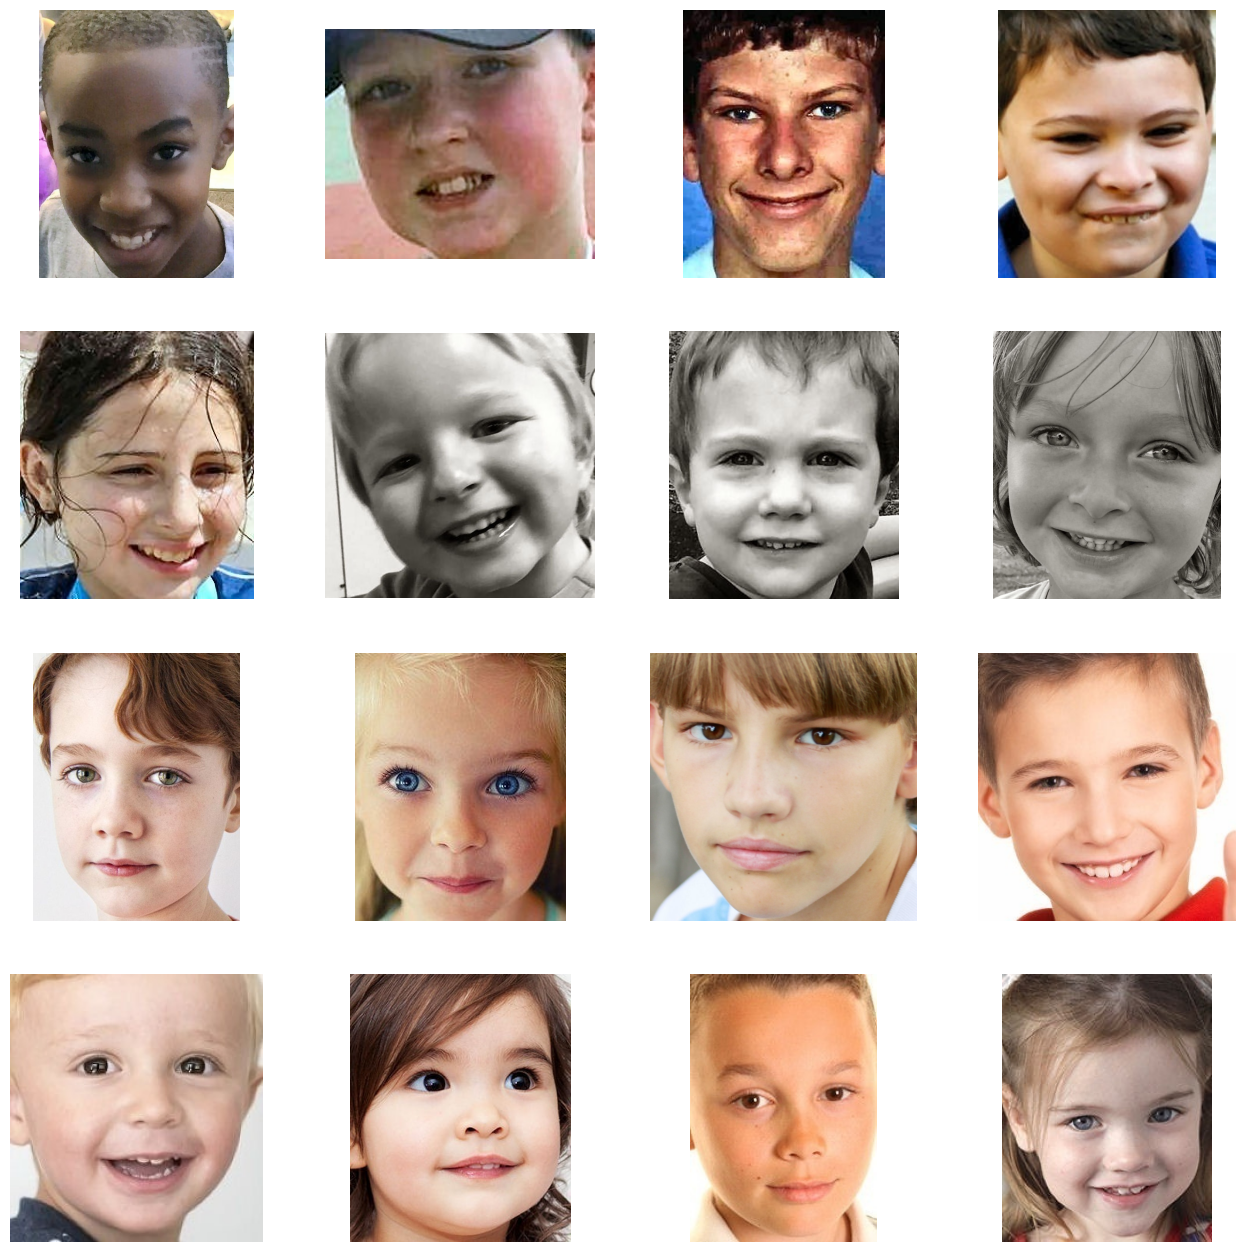

In [ ]:

# Set up matplotlib fig, and size it to fit 4x4 pics
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 100
train_asd_fnames = os.listdir( train_asd_dir )
train_nasd_fnames = os.listdir( train_nasd_dir )


next_asd_pix = [os.path.join(train_asd_dir, fname)
                for fname in train_asd_fnames[ pic_index-8:pic_index]
               ]

next_nasd_pix = [os.path.join(train_nasd_dir, fname)
                for fname in train_nasd_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_asd_pix+next_nasd_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

**Data Augmentation to make more photos**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True)

valid_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

#Training Set
train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/ASD_v4-20250417T093020Z-001/ASD_v4/train',
                                             target_size=(224,224),
                                             batch_size=10,
                                             class_mode='binary')
#Validation Set
valid_set = valid_datagen.flow_from_directory('/content/drive/MyDrive/ASD_v4-20250417T093020Z-001/ASD_v4/valid',
                                           target_size=(224,224),
                                           batch_size = 10,
                                           class_mode='binary',
                                           shuffle=False)
#Test Set
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/ASD_v4-20250417T093020Z-001/ASD_v4/test',
                                            target_size=(224,224),
                                            batch_size = 10,
                                            class_mode='binary',
                                            shuffle=False)

Found 2546 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Found 280 images belonging to 2 classes.


**Pretrained VGG 16 Model Importing**

In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Basic VGG16 Weight Not updated**

In [ ]:
#To set the layers to non-trainable (weights will not be updated)
for layer in base_model.layers:
    layer.trainable = False

**Last layer changed as per below**

In [ ]:
from tensorflow.keras import layers
import tensorflow as tf

# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer with 1 node for classification output
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

from tensorflow.keras import optimizers

learning_rate=0.0001

model.compile(optimizer = optimizers.Adam(learning_rate=learning_rate), loss = 'binary_crossentropy',metrics = ['acc'])
#model.compile(optimizer = tf.keras.optimizers.RMSprop(lr=0.0001), loss = 'binary_crossentropy',metrics = ['acc'])

In [ ]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 27,560,769 (105.14 MB)

 Trainable params: 12,846,081 (49.00 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

**Training using callback for early stop**

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

asd_vgg16_best = model.fit(
    train_set,
    validation_data=valid_set,
    steps_per_epoch=100,
    epochs=45,
    verbose=1,
    callbacks=[
        EarlyStopping(monitor='val_loss', patience=10),
        ModelCheckpoint(
            filepath='/content/drive/MyDrive/Colab Notebooks/Keras Tensorflow Project Summer School/DNN_Keras_Model.keras',
            save_best_only=True
        )
    ]
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/45
100/100 ━━━━━━━━━━━━━━━━━━━━ 295s 3s/step - acc: 0.6734 - loss: 0.7046 - val_acc: 0.8625 - val_loss: 0.3235
Epoch 2/45
100/100 ━━━━━━━━━━━━━━━━━━━━ 155s 2s/step - acc: 0.7351 - loss: 0.5422 - val_acc: 0.8875 - val_loss: 0.3334
Epoch 3/45
 55/100 ━━━━━━━━━━━━━━━━━━━━ 35s 785ms/step - acc: 0.7186 - loss: 0.5180

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:107: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


100/100 ━━━━━━━━━━━━━━━━━━━━ 45s 444ms/step - acc: 0.7323 - loss: 0.5071 - val_acc: 0.9125 - val_loss: 0.2818
Epoch 4/45
100/100 ━━━━━━━━━━━━━━━━━━━━ 94s 860ms/step - acc: 0.7774 - loss: 0.4751 - val_acc: 0.9250 - val_loss: 0.2807
Epoch 5/45
100/100 ━━━━━━━━━━━━━━━━━━━━ 63s 631ms/step - acc: 0.7366 - loss: 0.5251 - val_acc: 0.8625 - val_loss: 0.2840
Epoch 6/45
100/100 ━━━━━━━━━━━━━━━━━━━━ 21s 208ms/step - acc: 0.7222 - loss: 0.5354 - val_acc: 0.8875 - val_loss: 0.2909
Epoch 7/45
100/100 ━━━━━━━━━━━━━━━━━━━━ 42s 417ms/step - acc: 0.7776 - loss: 0.4575 - val_acc: 0.8250 - val_loss: 0.2948
Epoch 8/45
100/100 ━━━━━━━━━━━━━━━━━━━━ 28s 280ms/step - acc: 0.7806 - loss: 0.4368 - val_acc: 0.9125 - val_loss: 0.2345
Epoch 9/45
100/100 ━━━━━━━━━━━━━━━━━━━━ 15s 148ms/step - acc: 0.7773 - loss: 0.4615 - val_acc: 0.9125 - val_loss: 0.2642
Epoch 10/45
100/100 ━━━━━━━━━━━━━━━━━━━━ 81s 234ms/step - acc: 0.7784 - loss: 0.4317 - val_acc: 0.9000 - val_loss: 0.2670
Epoch 11/45
100/100 ━━━━━━━━━━━━━━━━━━━━ 2

**Save model**

In [ ]:
model.save('/content/drive/MyDrive/ASD_v4-20250417T093020Z-001/ASD_v4/VGG16_best.h5')

**Model Accuracy and Loss Plotting**

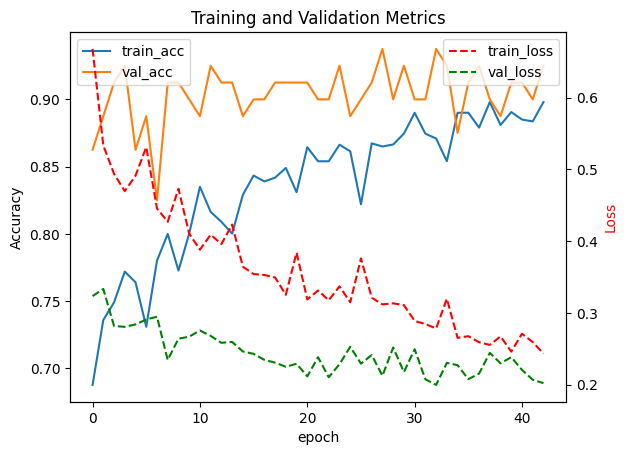

In [ ]:
import keras
from matplotlib import pyplot as plt

plt.plot(asd_vgg16_best.history['acc'])
plt.plot(asd_vgg16_best.history['val_acc'])
plt.title('Training and Validation Metrics')  # Updated title
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train_acc', 'val_acc'], loc='upper left')  # Updated legend

ax2 = plt.gca().twinx()  # Create a secondary y-axis
ax2.plot(asd_vgg16_best.history['loss'], linestyle='--', color='red')  # Plot loss
ax2.plot(asd_vgg16_best.history['val_loss'], linestyle='--', color='green')  # Plot validation loss
ax2.set_ylabel('Loss', color='red')  # Label the secondary y-axis
ax2.legend(['train_loss', 'val_loss'], loc='upper right')  # Add a legend for loss

plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score
import numpy as np

# 1. Training accuracy
train_loss, train_acc = asd_vgg16_best.model.evaluate(train_set, verbose=0)
print(f"Training Accuracy: {train_acc:.4f}")

# 2. Validation accuracy
val_loss, val_acc = asd_vgg16_best.model.evaluate(valid_set, verbose=0)
print(f"Validation Accuracy: {val_acc:.4f}")

# 3. Test accuracy
test_loss, test_acc = asd_vgg16_best.model.evaluate(test_set, verbose=0)
print(f"Test Accuracy: {test_acc:.4f}")

# 4. Test precision
y_pred = asd_vgg16_best.model.predict(test_set)
y_pred_classes = (y_pred > 0.5).astype(int).reshape(-1)  # For binary classification
y_true = test_set.classes  # True labels from generator

precision = precision_score(y_true, y_pred_classes)
print(f"Test Precision: {precision:.4f}")


Training Accuracy: 0.9277
Validation Accuracy: 0.9250
Test Accuracy: 0.9250
28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step
Test Precision: 0.9760
